In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
import random
import pickle
from sklearn.model_selection import train_test_split
from PIL import Image

In [2]:
dest='./data'
Types=['dog','cat']#dog=0, cat=1

## To see which size is good to take as a downscale image. Not to unclear to see.

In [3]:
for types in Types:
    path=os.path.join(dest,types)
    for img in os.listdir(path):
        img_array =cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)

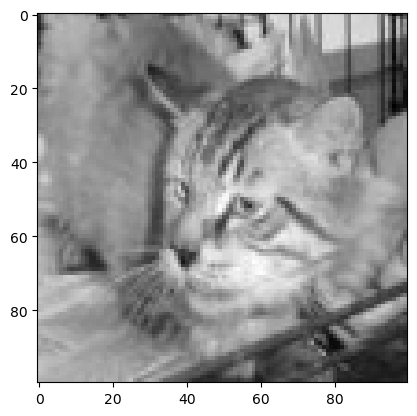

In [4]:
new_array= cv2.resize(img_array, (100, 100))
plt.imshow(new_array, cmap='gray')
plt.show()

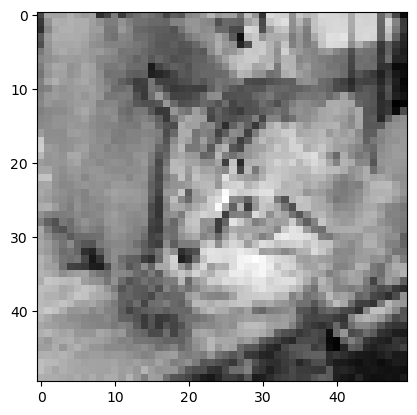

In [5]:
new_array= cv2.resize(img_array, (50, 50))
plt.imshow(new_array, cmap='gray')
plt.show()

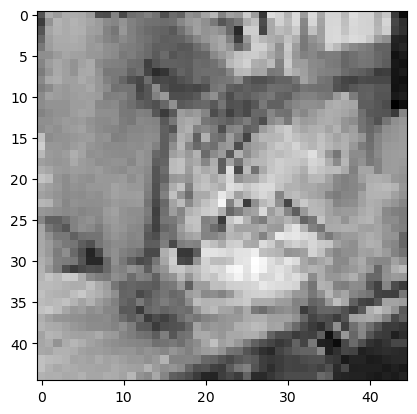

In [6]:
new_array= cv2.resize(img_array, (45, 45))
plt.imshow(new_array, cmap='gray')
plt.show()

## I think 50x50 seems like a good size.
## See if other images looks goog too.

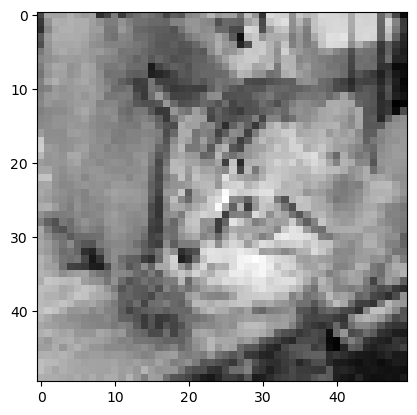

In [7]:
new_array= cv2.resize(img_array, (50, 50))
plt.imshow(new_array, cmap='gray')
plt.show()

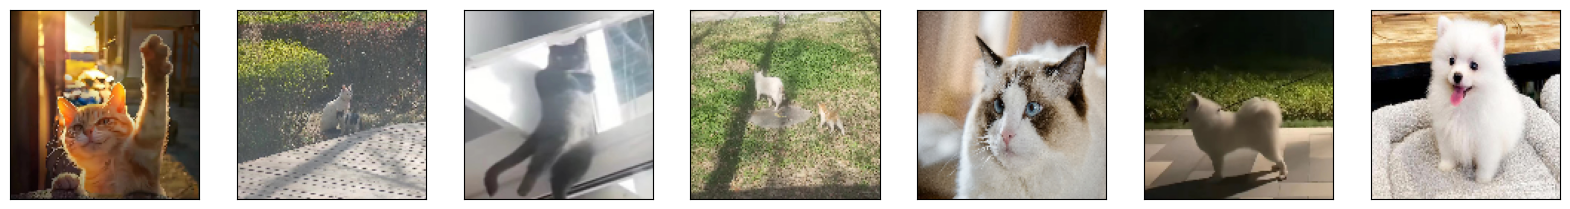

In [8]:
imagepath="./example photo for display./"
fig, axs = plt.subplots(1, 7, figsize=(20, 20))
for x in range(1,8):
    img=plt.imread(imagepath+"photo"+str(x)+".jpg")
    img= cv2.resize(img, (128, 128))
    axs[x-1].imshow(img)

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Show the plot
plt.show()

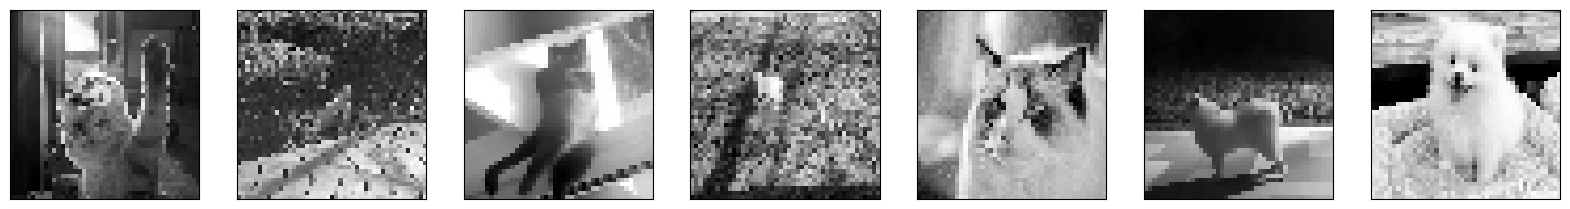

In [9]:
imagepath = "./example photo for display/"
fig, axs = plt.subplots(1, 7, figsize=(20, 20))
for x in range(1, 8):
    img = plt.imread(imagepath + "photo" + str(x) + ".jpg")
    img = cv2.resize(img, (45, 45))
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # convert image to grayscale
    axs[x-1].imshow(img_gray, cmap='gray')

    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])

# Show the plot
plt.show()

## Downscaling in some pictures will cause it difficult to see if a picture is cat or dog.
## We expect the model with downscaling to be perform worse in accuracy.
## But not downscaling the images in CNN could cause overfitting and potentially lead to higher validation loss.

## We want to see whether which data input (image) gives the best model
## 1. Original size (128x128) with colour
## 2. Original size (128x128) with Greyscale
## 3. Downscale size (50x50) with colour
## 4. Downscale size (50x50) with Greyscale

## 1. Original size (128x128) with colour

45283 45283


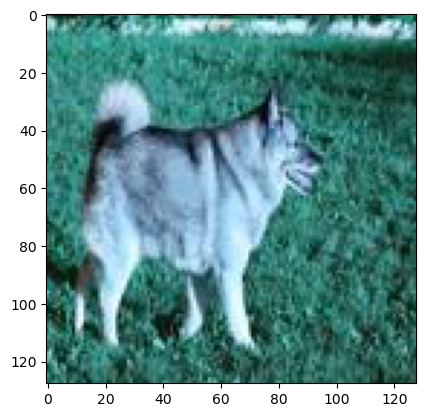

In [10]:
training_data=[]
IMG_SIZE=128
def create_training_data():
    for types in Types:
        path=os.path.join(dest,types)
        class_num=Types.index(types)
        for img in os.listdir(path):
            try:
                img_array =cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except:
                continue

create_training_data()

X=[]
y=[]

for features, label in training_data:
    X.append(features)
    y.append(label)

X= np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y=np.array(y)
print(len(X),len(y))
plt.imshow(Image.fromarray(X[0]))


In [11]:
print(X[0],y[0])

[[[ 51  83  78]
  [ 39  73  67]
  [  0  17   9]
  ...
  [ 29 143 113]
  [ 50 167 134]
  [  0 112  79]]

 [[136 170 164]
  [116 152 146]
  [ 57  98  90]
  ...
  [ 37 144 118]
  [ 46 153 126]
  [  0  79  51]]

 [[186 226 221]
  [180 221 216]
  [157 201 194]
  ...
  [ 49 140 125]
  [ 28 122 105]
  [  0  74  54]]

 ...

 [[ 79 154 140]
  [ 38 110  97]
  [  6  76  63]
  ...
  [ 23  68  52]
  [ 62 107  91]
  [ 47  92  76]]

 [[ 49 124 110]
  [ 27 102  88]
  [ 11  83  70]
  ...
  [ 16  61  45]
  [ 60 105  89]
  [ 52  95  80]]

 [[ 42 117 103]
  [ 26 101  87]
  [ 46 118 105]
  ...
  [ 39  84  68]
  [ 40  85  69]
  [ 41  84  69]]] 0


In [12]:
pickle_out=open("Try different input\X_128_C","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out=open("Try different input\y_128_C","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

## 2. Original size (128x128) with Greyscale

45283 45283


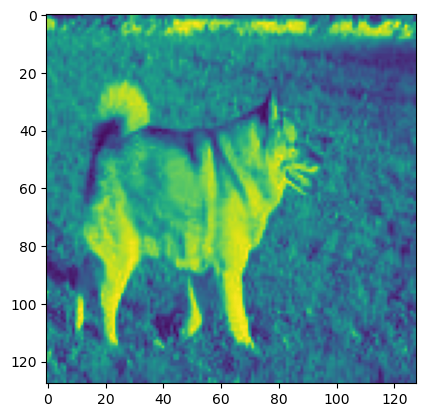

In [13]:
training_data=[]
IMG_SIZE=128
def create_training_data():
    for types in Types:
        path=os.path.join(dest,types)
        class_num=Types.index(types)
        for img in os.listdir(path):
            try:
                img_array =cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except:
                continue

create_training_data()
X=[]
y=[]

for features, label in training_data:
    X.append(features)
    y.append(label)

X= np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y=np.array(y)
print(len(X),len(y))
plt.imshow(X[0])

In [14]:
print(X[0],y[0])

[[[ 78]
  [ 67]
  [ 10]
  ...
  [121]
  [144]
  [ 89]]

 [[164]
  [146]
  [ 91]
  ...
  [124]
  [133]
  [ 58]]

 [[220]
  [215]
  [194]
  ...
  [125]
  [106]
  [ 57]]

 ...

 [[141]
  [ 98]
  [ 64]
  ...
  [ 58]
  [ 97]
  [ 82]]

 [[111]
  [ 89]
  [ 71]
  ...
  [ 51]
  [ 95]
  [ 86]]

 [[104]
  [ 88]
  [106]
  ...
  [ 74]
  [ 75]
  [ 75]]] 0


In [15]:
pickle_out=open("Try different input\X_128_G","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out=open("Try different input\y_128_G","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

## 3. Downscale size (50x50) with colour

45283 45283


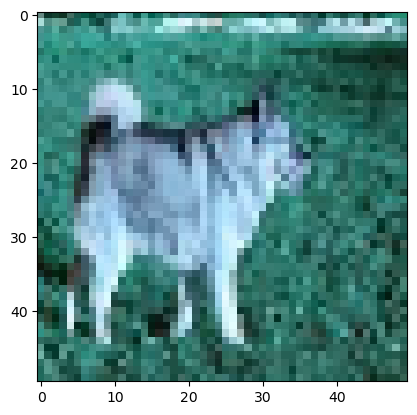

In [16]:
training_data=[]
IMG_SIZE=50
def create_training_data():
    for types in Types:
        path=os.path.join(dest,types)
        class_num=Types.index(types)
        for img in os.listdir(path):
            try:
                img_array =cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except:
                continue

create_training_data()

X=[]
y=[]

for features, label in training_data:
    X.append(features)
    y.append(label)

X= np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y=np.array(y)
print(len(X),len(y))
plt.imshow(Image.fromarray(X[0]))


In [17]:
print(X[0],y[0])

[[[103 138 132]
  [ 12  52  42]
  [ 19  63  47]
  ...
  [ 36 125 111]
  [ 40 141 119]
  [ 36 141 112]]

 [[171 221 216]
  [ 80 141 131]
  [102 165 151]
  ...
  [196 248 250]
  [111 176 176]
  [ 69 142 138]]

 [[ 79 149 146]
  [ 58 141 131]
  [ 88 174 160]
  ...
  [ 84 126 139]
  [159 209 219]
  [136 190 198]]

 ...

 [[ 46 115 102]
  [ 85 148 137]
  [ 53 111 100]
  ...
  [ 54 109  94]
  [ 67 119 105]
  [ 33  79  66]]

 [[ 31 103  90]
  [ 86 153 140]
  [ 70 129 118]
  ...
  [ 41  91  77]
  [ 64 110  97]
  [ 41  85  72]]

 [[ 31 106  92]
  [ 51 119 106]
  [ 76 135 124]
  ...
  [ 24  69  53]
  [ 25  70  54]
  [ 54  99  83]]] 0


In [18]:
pickle_out=open("Try different input\X_50_C","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out=open("Try different input\y_50_C","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

## 4. Downscale size (50x50) with Greyscale

45283 45283


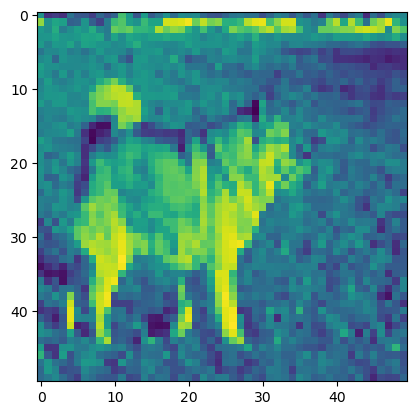

In [19]:
training_data=[]
IMG_SIZE=50
def create_training_data():
    for types in Types:
        path=os.path.join(dest,types)
        class_num=Types.index(types)
        for img in os.listdir(path):
            try:
                img_array =cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except:
                continue

create_training_data()
X=[]
y=[]

for features, label in training_data:
    X.append(features)
    y.append(label)

X= np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y=np.array(y)
print(len(X),len(y))
plt.imshow(X[0])

In [20]:
print(X[0],y[0])

[[[132]
  [ 44]
  [ 53]
  ...
  [111]
  [123]
  [120]]

 [[214]
  [131]
  [153]
  ...
  [246]
  [169]
  [132]]

 [[140]
  [129]
  [160]
  ...
  [125]
  [206]
  [187]]

 ...

 [[103]
  [137]
  [101]
  ...
  [ 98]
  [109]
  [ 70]]

 [[ 91]
  [141]
  [119]
  ...
  [ 81]
  [101]
  [ 76]]

 [[ 93]
  [107]
  [125]
  ...
  [ 59]
  [ 60]
  [ 89]]] 0


In [21]:
pickle_out=open("Try different input\X_50_G","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out=open("Try different input\y_50_G","wb")
pickle.dump(y, pickle_out)
pickle_out.close()